<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Teleportation</h1>

</div>

### Overview:
[Importing Necessary Libraries and Provider](#part1)<br><br>
[Teleportation (generalised)](#sdc)<br>

<a id = 'part1'></a>
### Importing Necessary Libraries And Provider:

In [1]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit_textbook.tools import array_to_latex, random_state
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.tools import random_state, array_to_latex
import qiskit as q
%matplotlib inline
import numpy as np
provider = IBMQ.load_account()

<a id = 'sdc'></a>
### Teleportation (generalised)

#### Steps involved
#####  6 Steps:
**1. Initialization:**  Create a randomized state that the sender wants to send. Then create a quantum circuit using 3 qubits (an exotic state and other 2 from to-be distributed bell-pair) and 2 classical bits in 2 different registers<br><br>
**2. Create Bell Pair:** Third party forms a bell pair<br><br>
**3. Distribution:** Distribute the entangled pair of qubit among sender and receiver<br><br>
**4. Bell measurement:** Sender measures the exotic and h(is/er) bell-pair and stores into 2 classical bits<br><br>
**5. Transmission:** Sender sends those two classical bits to the receiver through classical communication channel<br><br>
**6. State Acquisition:** Receiver performs operation on h(is/er) bell-pair according to the received classical bits of information and obtains the exotic state.

<IPython.core.display.Math object>

The state that sender wants to send


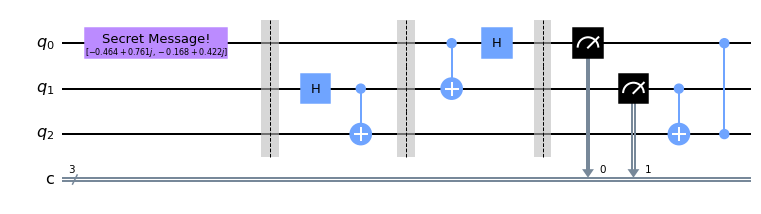

<IPython.core.display.Math object>

The state that has been transported to the receiver


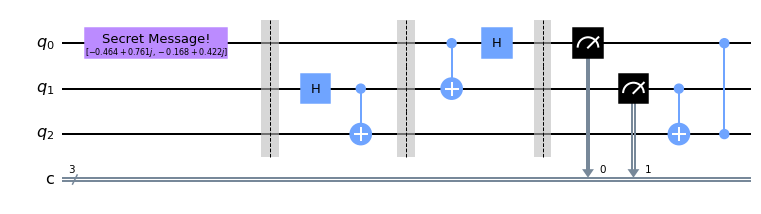

In [2]:
# psi = q.quantum_info.random_state(2)
psi = random_state(1)
psi_state = array_to_latex(psi)
print("The state that sender wants to send")
psi_state
exotic_state = q.extensions.Initialize(psi)
exotic_state.label = "Secret Message!"
qc = q.QuantumCircuit(3,3)
qc.append(exotic_state,[0])
qc.barrier()
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure((0,1),(0,1))
qc.cx(1,2)
qc.cz(0,2)
# qc.measure(2,2)
display(qc.draw('mpl'))
backend = q.Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
state_vector = result.get_statevector( decimals = 3)
state = array_to_latex(state_vector)
print("The state that has been transported to the receiver")
state